# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
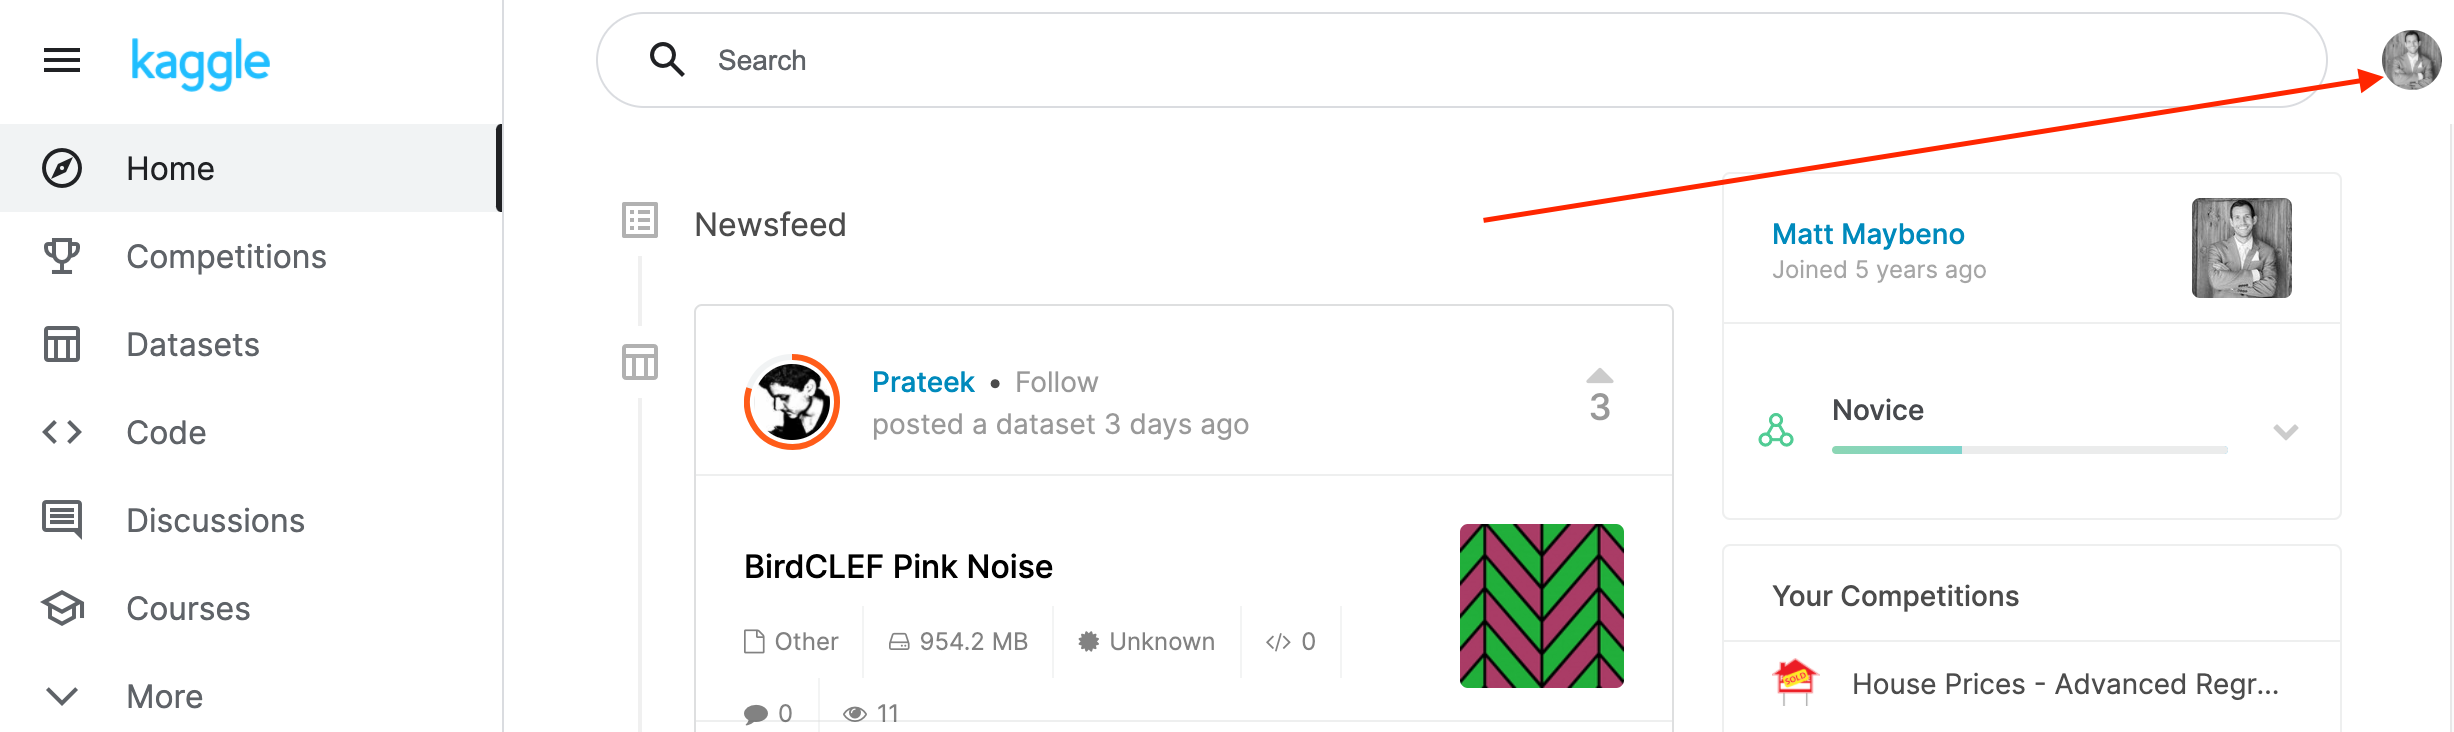
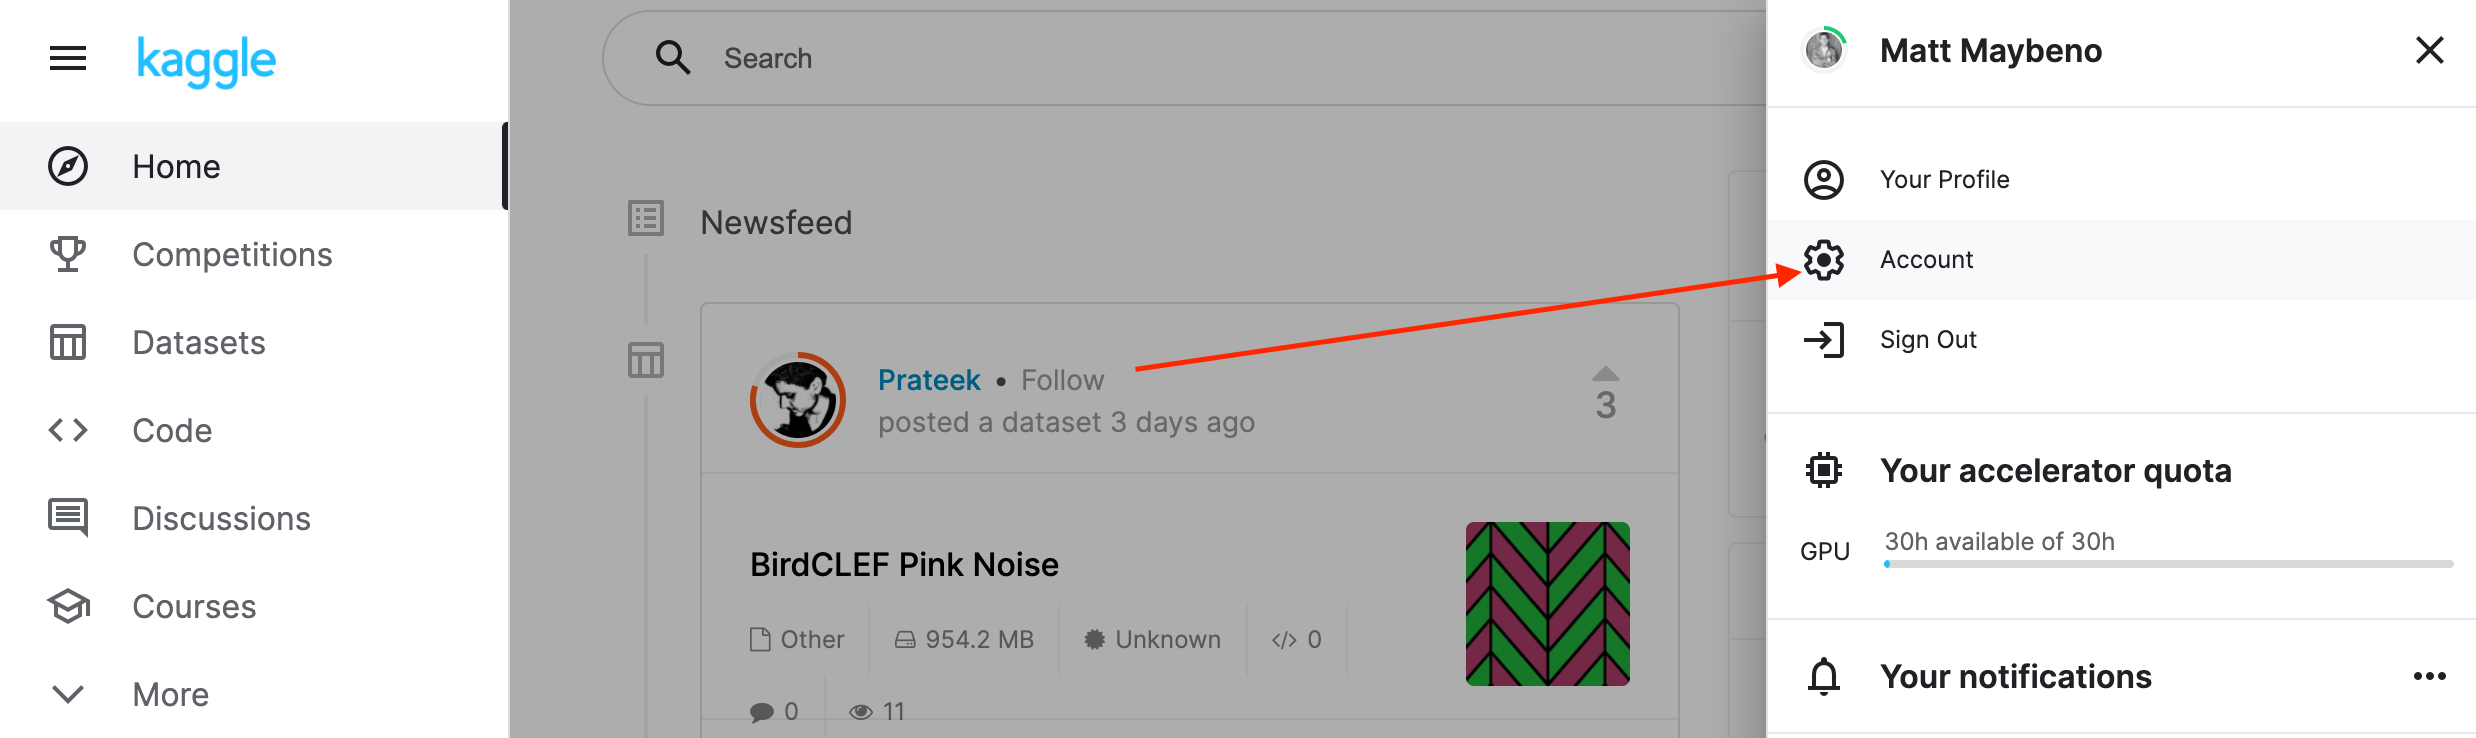
2. Scroll down to API and click Create New API Token.
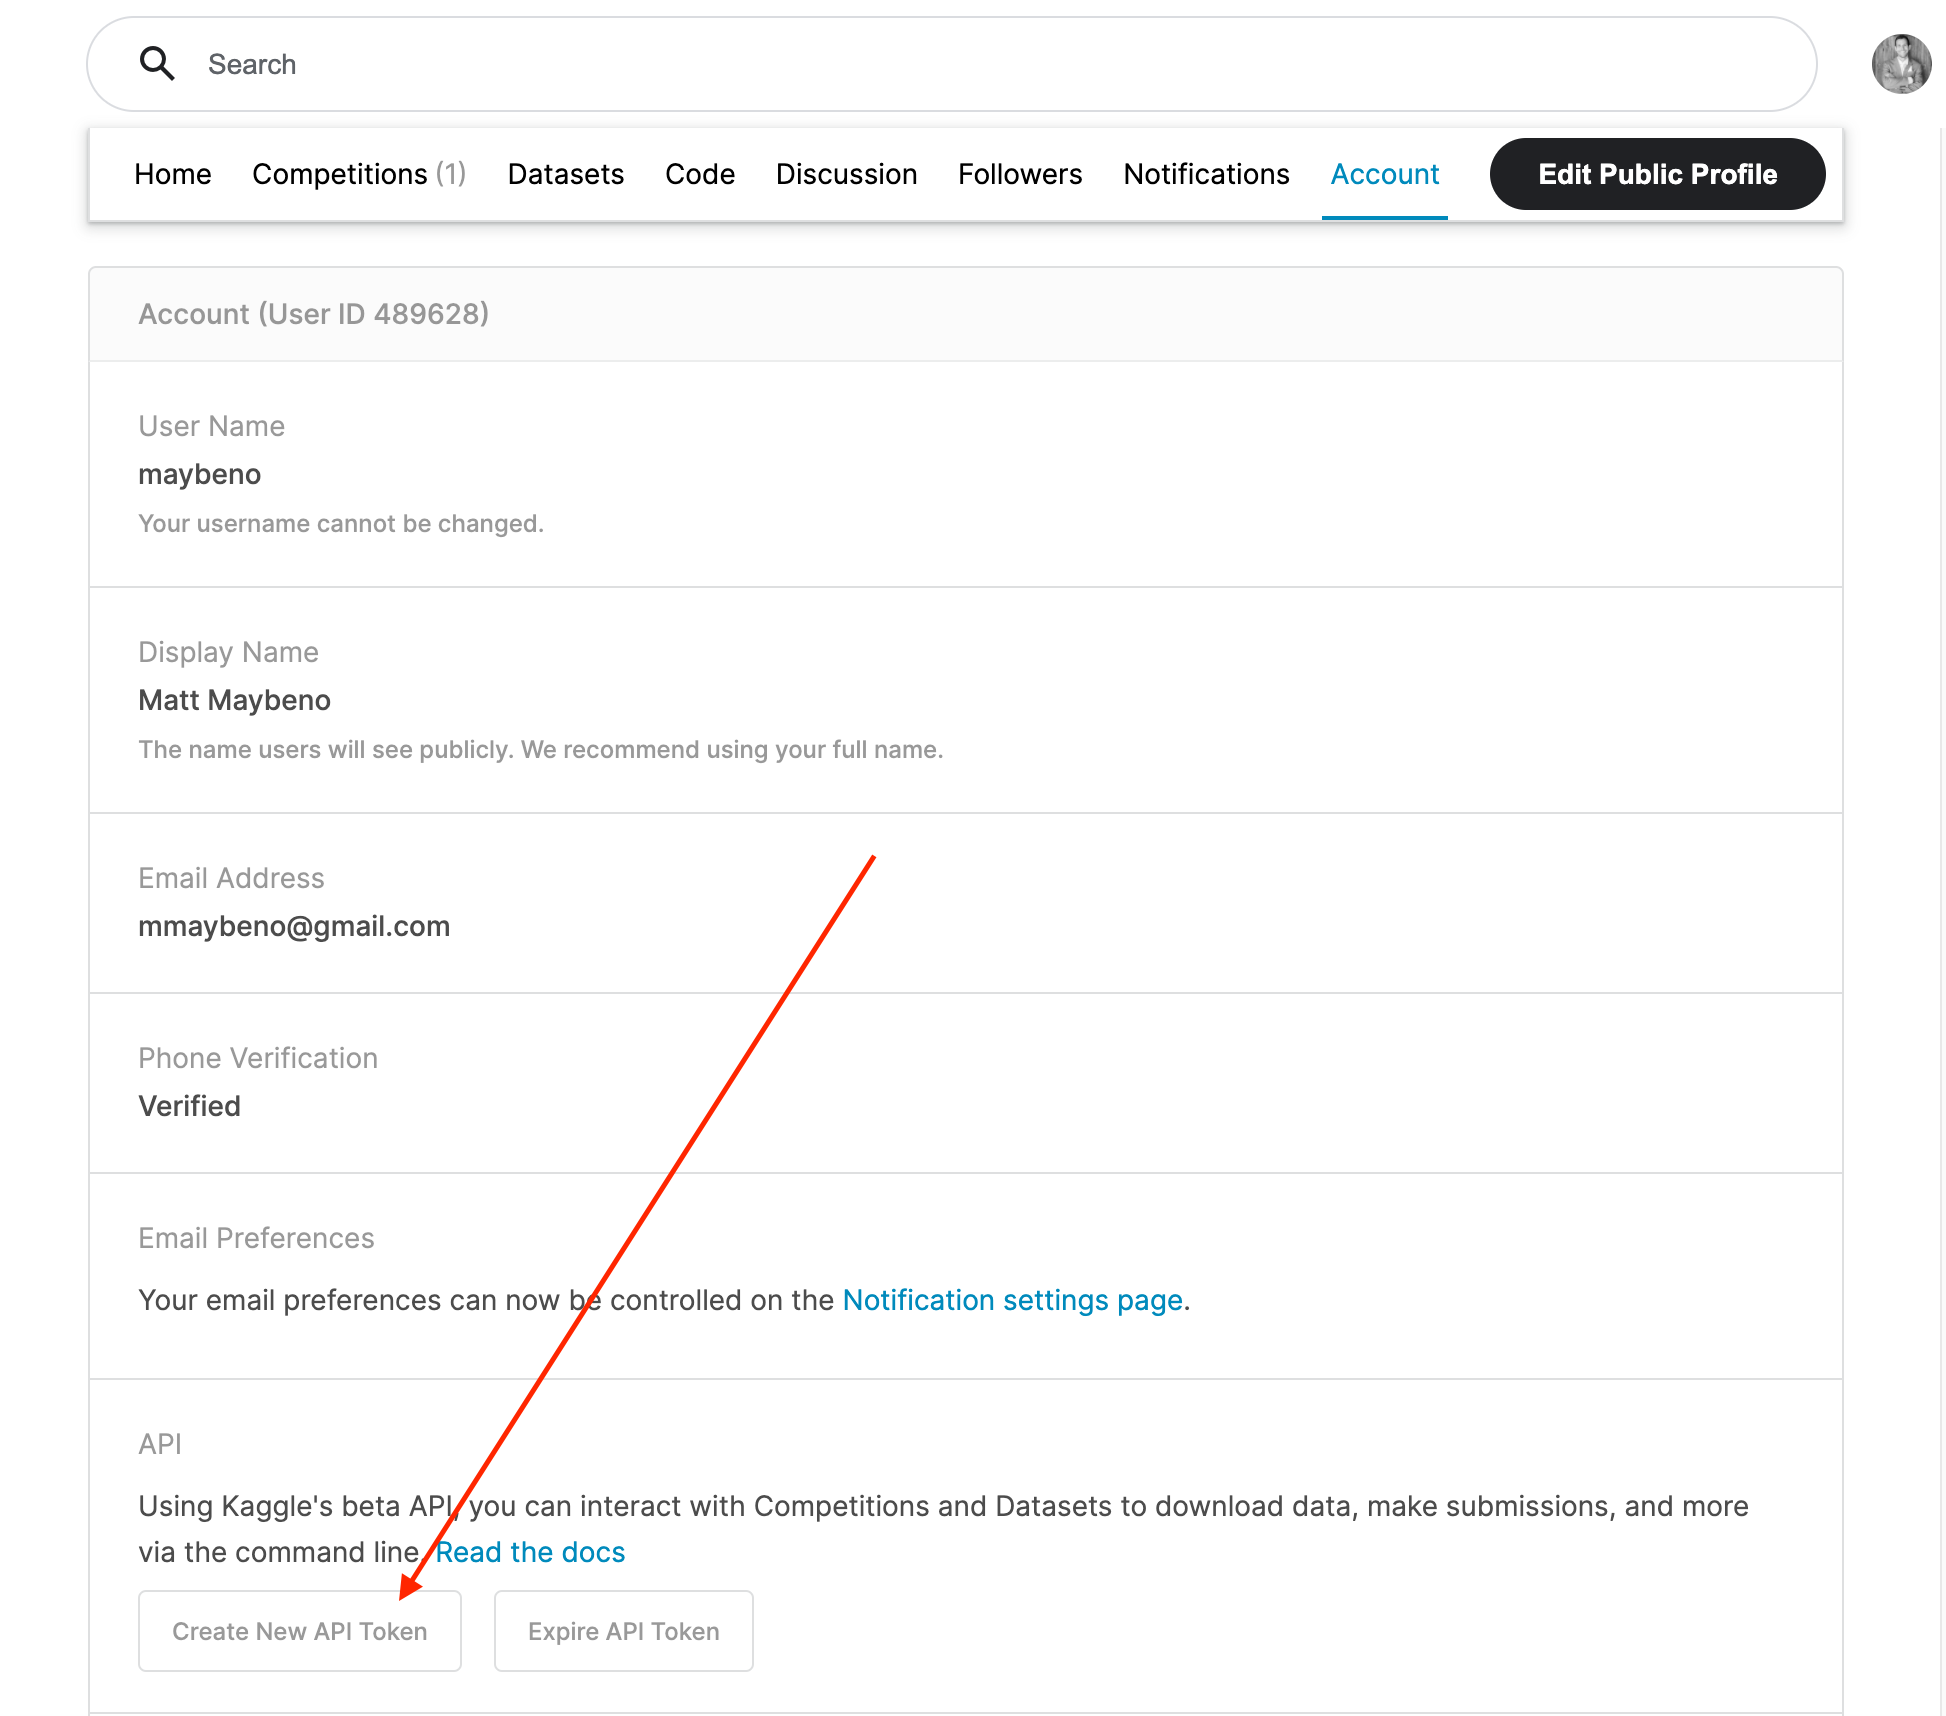
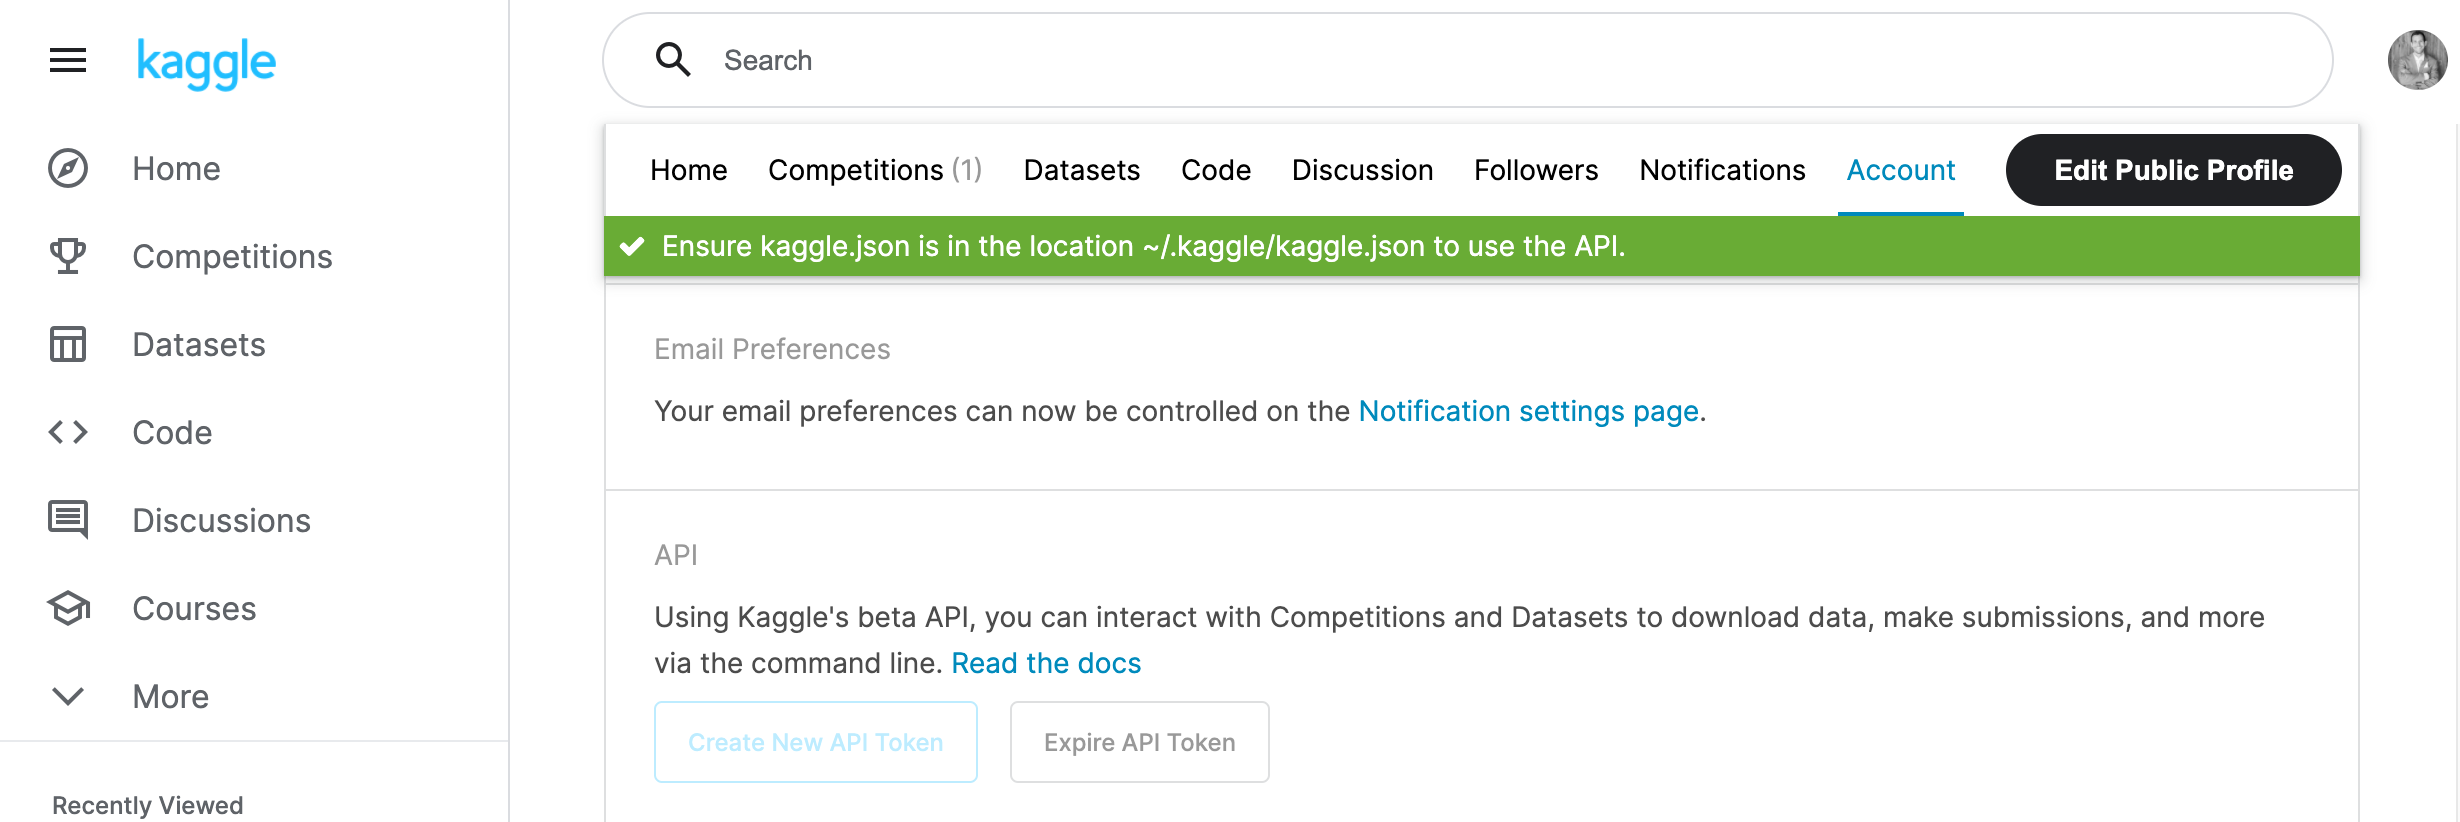
3. Open up `kaggle.json` and use the username and key.
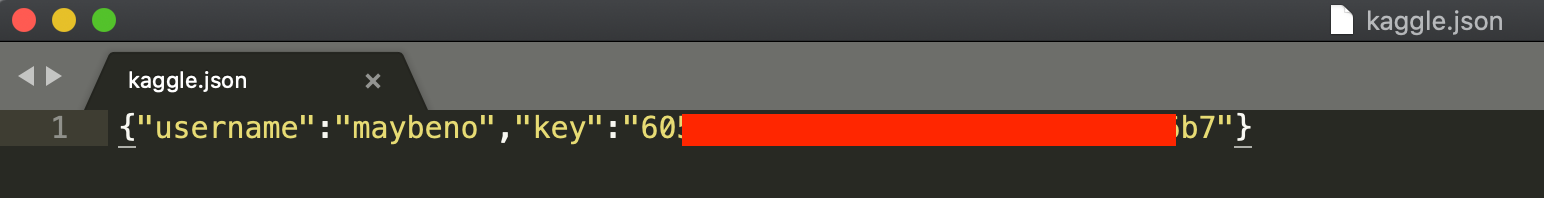

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

### Setup Kaggle API Key

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

In [2]:
# Dowmload and unzip 'Bike Sharing Demand' dataset from Kaggle

# Install Kaggle API client
!pip install -q Kaggle

# Upload Kaggle API token (json file) -- (Uncomment) Only for Google Colab (For AWS Sagemaker upload 'kaggle.json')
# from google.colab import files             
# files.upload() 

# create a kaggle directory
!mkdir ~/.kaggle          # (-----------------------------------------   Uncomment - For first time only)

# copy 'kaggle.json' (Kaggle API Token) to the folder we have created
!cp kaggle.json ~/.kaggle/

# Authorize permissions for the json to act
!chmod 600 ~/.kaggle/kaggle.json

# Download the Bike Sharing Demand dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand

# # Unzip Dataset (Over-write to avoid error, if the dataset pre-exists)
!unzip -o bike-sharing-demand.zip    # -o: over-writes if the file pre-exists

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
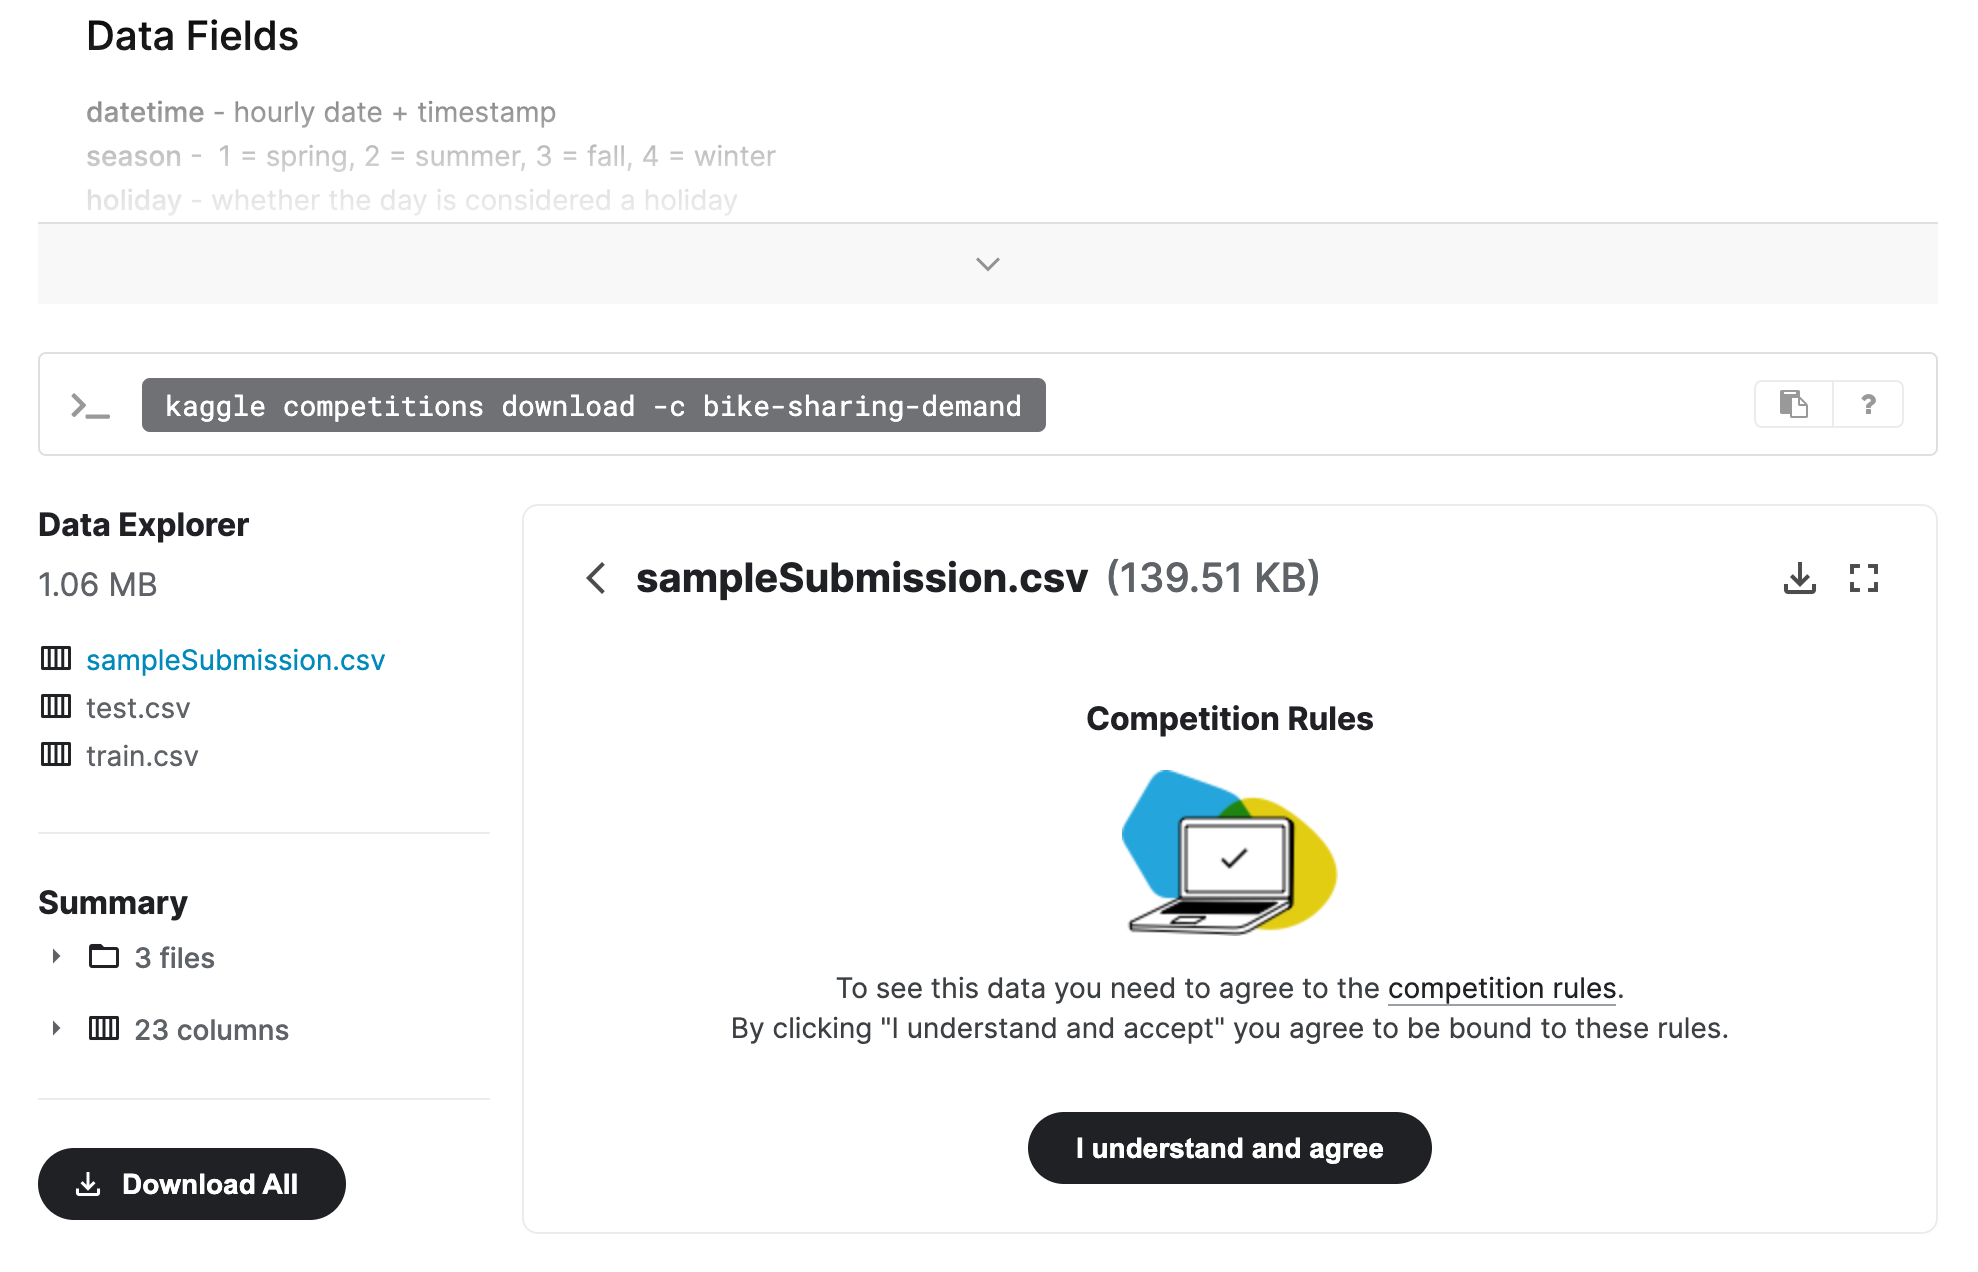

In [2]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [3]:
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
submission = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
predictor = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(
    train_data=train, time_limit=600, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_213027"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240430_213027"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   5.28 GB / 5.36 GB (98.5%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2305.24 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory

[1000]	valid_set's rmse: 131.684
[2000]	valid_set's rmse: 130.67
[3000]	valid_set's rmse: 130.626
[1000]	valid_set's rmse: 135.592
[1000]	valid_set's rmse: 133.481
[2000]	valid_set's rmse: 132.323
[3000]	valid_set's rmse: 131.618
[4000]	valid_set's rmse: 131.443
[5000]	valid_set's rmse: 131.265
[6000]	valid_set's rmse: 131.277
[7000]	valid_set's rmse: 131.443
[1000]	valid_set's rmse: 128.503
[2000]	valid_set's rmse: 127.654
[3000]	valid_set's rmse: 127.227
[4000]	valid_set's rmse: 127.105
[1000]	valid_set's rmse: 134.135
[2000]	valid_set's rmse: 132.272
[3000]	valid_set's rmse: 131.286
[4000]	valid_set's rmse: 130.752
[5000]	valid_set's rmse: 130.363
[6000]	valid_set's rmse: 130.509
[1000]	valid_set's rmse: 136.168
[2000]	valid_set's rmse: 135.138
[3000]	valid_set's rmse: 135.029
[1000]	valid_set's rmse: 134.061
[2000]	valid_set's rmse: 133.034
[3000]	valid_set's rmse: 132.182
[4000]	valid_set's rmse: 131.997
[5000]	valid_set's rmse: 131.643
[6000]	valid_set's rmse: 131.504
[7000]	vali

	-131.4609	 = Validation score   (-root_mean_squared_error)
	47.34s	 = Training   runtime
	5.99s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 336.07s of the 536.13s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 130.818
[1000]	valid_set's rmse: 133.204
[1000]	valid_set's rmse: 130.928
[1000]	valid_set's rmse: 126.846
[1000]	valid_set's rmse: 131.426
[1000]	valid_set's rmse: 133.655
[1000]	valid_set's rmse: 132.155
[1000]	valid_set's rmse: 130.62


	-131.0542	 = Validation score   (-root_mean_squared_error)
	11.22s	 = Training   runtime
	1.05s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 322.23s of the 522.28s of remaining time.
	-116.5484	 = Validation score   (-root_mean_squared_error)
	15.84s	 = Training   runtime
	0.94s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 304.35s of the 504.41s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4791.
	Ran out of time, early stopping on iteration 4676.
	Ran out of time, early stopping on iteration 4887.
	Ran out of time, early stopping on iteration 4971.
	-130.5183	 = Validation score   (-root_mean_squared_error)
	235.13s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 68.97s of the 269.03s of remaining time.
	-124.6007	 = Validation scor

[1000]	valid_set's rmse: 60.0703
[2000]	valid_set's rmse: 59.4042
[1000]	valid_set's rmse: 60.0495
[2000]	valid_set's rmse: 59.136
[1000]	valid_set's rmse: 63.2694
[2000]	valid_set's rmse: 62.302
[1000]	valid_set's rmse: 63.0988
[2000]	valid_set's rmse: 61.8387
[1000]	valid_set's rmse: 58.3517
[2000]	valid_set's rmse: 57.3112
[3000]	valid_set's rmse: 57.2273
[1000]	valid_set's rmse: 62.3094
[2000]	valid_set's rmse: 61.3461
[1000]	valid_set's rmse: 63.4202
[2000]	valid_set's rmse: 62.4439
[3000]	valid_set's rmse: 62.1626
[1000]	valid_set's rmse: 57.84


	-60.034	 = Validation score   (-root_mean_squared_error)
	41.8s	 = Training   runtime
	3.21s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 150.79s of the 150.78s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.0482	 = Validation score   (-root_mean_squared_error)
	12.12s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 138.08s of the 138.06s of remaining time.
	-53.2501	 = Validation score   (-root_mean_squared_error)
	48.55s	 = Training   runtime
	0.64s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 88.37s of the 88.36s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1198.
	Ran out of time, early stopping on iteration 1413.
	Ran out of time, early stopping on iteration 1302.
	Ran 

In [6]:
predictor = TabularPredictor.load("AutogluonModels/ag-20240430_213027")

### Review AutoGluon's training run with ranking of models that did the best.

In [48]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -37.204312       7.131265  191.360563                0.002740           1.152184            2       True          6
1     XGBoost_BAG_L1/T3 -37.210337       3.227705   98.683175                3.227705          98.683175            1       True          3
2     XGBoost_BAG_L2/T4 -38.025607      14.856861  375.349005                0.244806          14.687901            2       True         10
3   WeightedEnsemble_L3 -38.025607      14.857437  375.581874                0.000576           0.232869            3       True         12
4     XGBoost_BAG_L2/T1 -38.361395      14.820277  375.167990                0.208222          14.506886            2       True          7
5     XGBoost_BAG_L2/T5 -38.377256      15.252895  404.455776                0.640840          43.

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T3': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T4': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T5': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T3': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T4': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T5': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'XGBoost_BAG_L1/T1': -41.25180984349735,
  'XGBoost_BAG_L1/T2': -40.16697549653705,
  'XGBoost_BAG_L1/T3': -37.21033705016009,
  'XGBoost_BAG_L1/T4': -45.199172776080864,
  'XGBoost_BAG_L1/T5': -44.511863806083866,
  'WeightedEnsemble_L2': -37.20431186014596,
  'XGBoost_BAG_L2/T1': -38.361394947558786,
  'XGBo

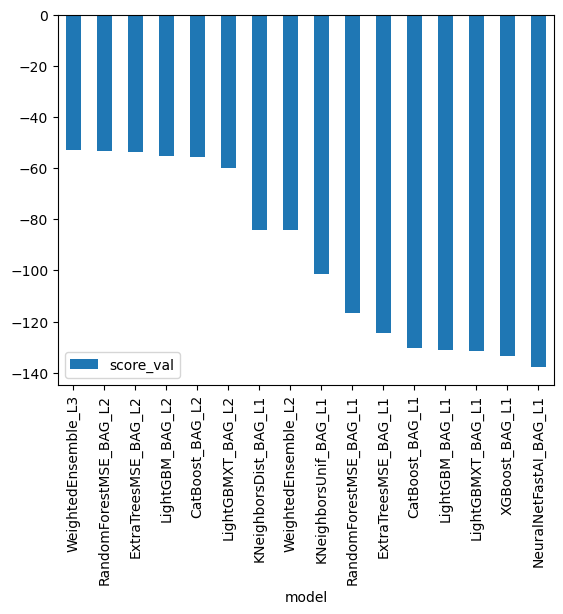

In [8]:
#output the model's 'score_val' in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions.head()

0    24.000914
1    40.648846
2    45.908428
3    49.278130
4    52.128906
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      101.121933
std        90.403038
min         2.992772
25%        21.822069
50%        62.795776
75%       171.675629
max       364.713531
Name: count, dtype: float64

In [15]:
# How many negative values do we have?
predictions[ predictions<0 ].count()

0

In [16]:
# Set them to zero
predictions[predictions<0] = 0

In [17]:
submission["count"] = predictions

In [18]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,24.000914
1,2011-01-20 01:00:00,40.648846
2,2011-01-20 02:00:00,45.908428
3,2011-01-20 03:00:00,49.278130
4,2011-01-20 04:00:00,52.128906


In [19]:
submission.to_csv("submission.csv", index=False)

### Set predictions to submission dataframe, save, and submit

In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 672kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName            date                 description           status    publicScore  privateScore  
------------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv      2024-04-30 21:44:37  first raw submission  complete  1.80161      1.80161       
submission.csv      2024-04-29 21:39:17  first raw submission  error                                
submission (1).csv  2024-04-29 20:57:04                        error                                
submission.csv      2024-04-29 18:58:36  first raw submission  error                                


#### Initial score of 1.80161

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [9]:
!pip install seaborn
!pip install matplotlib

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


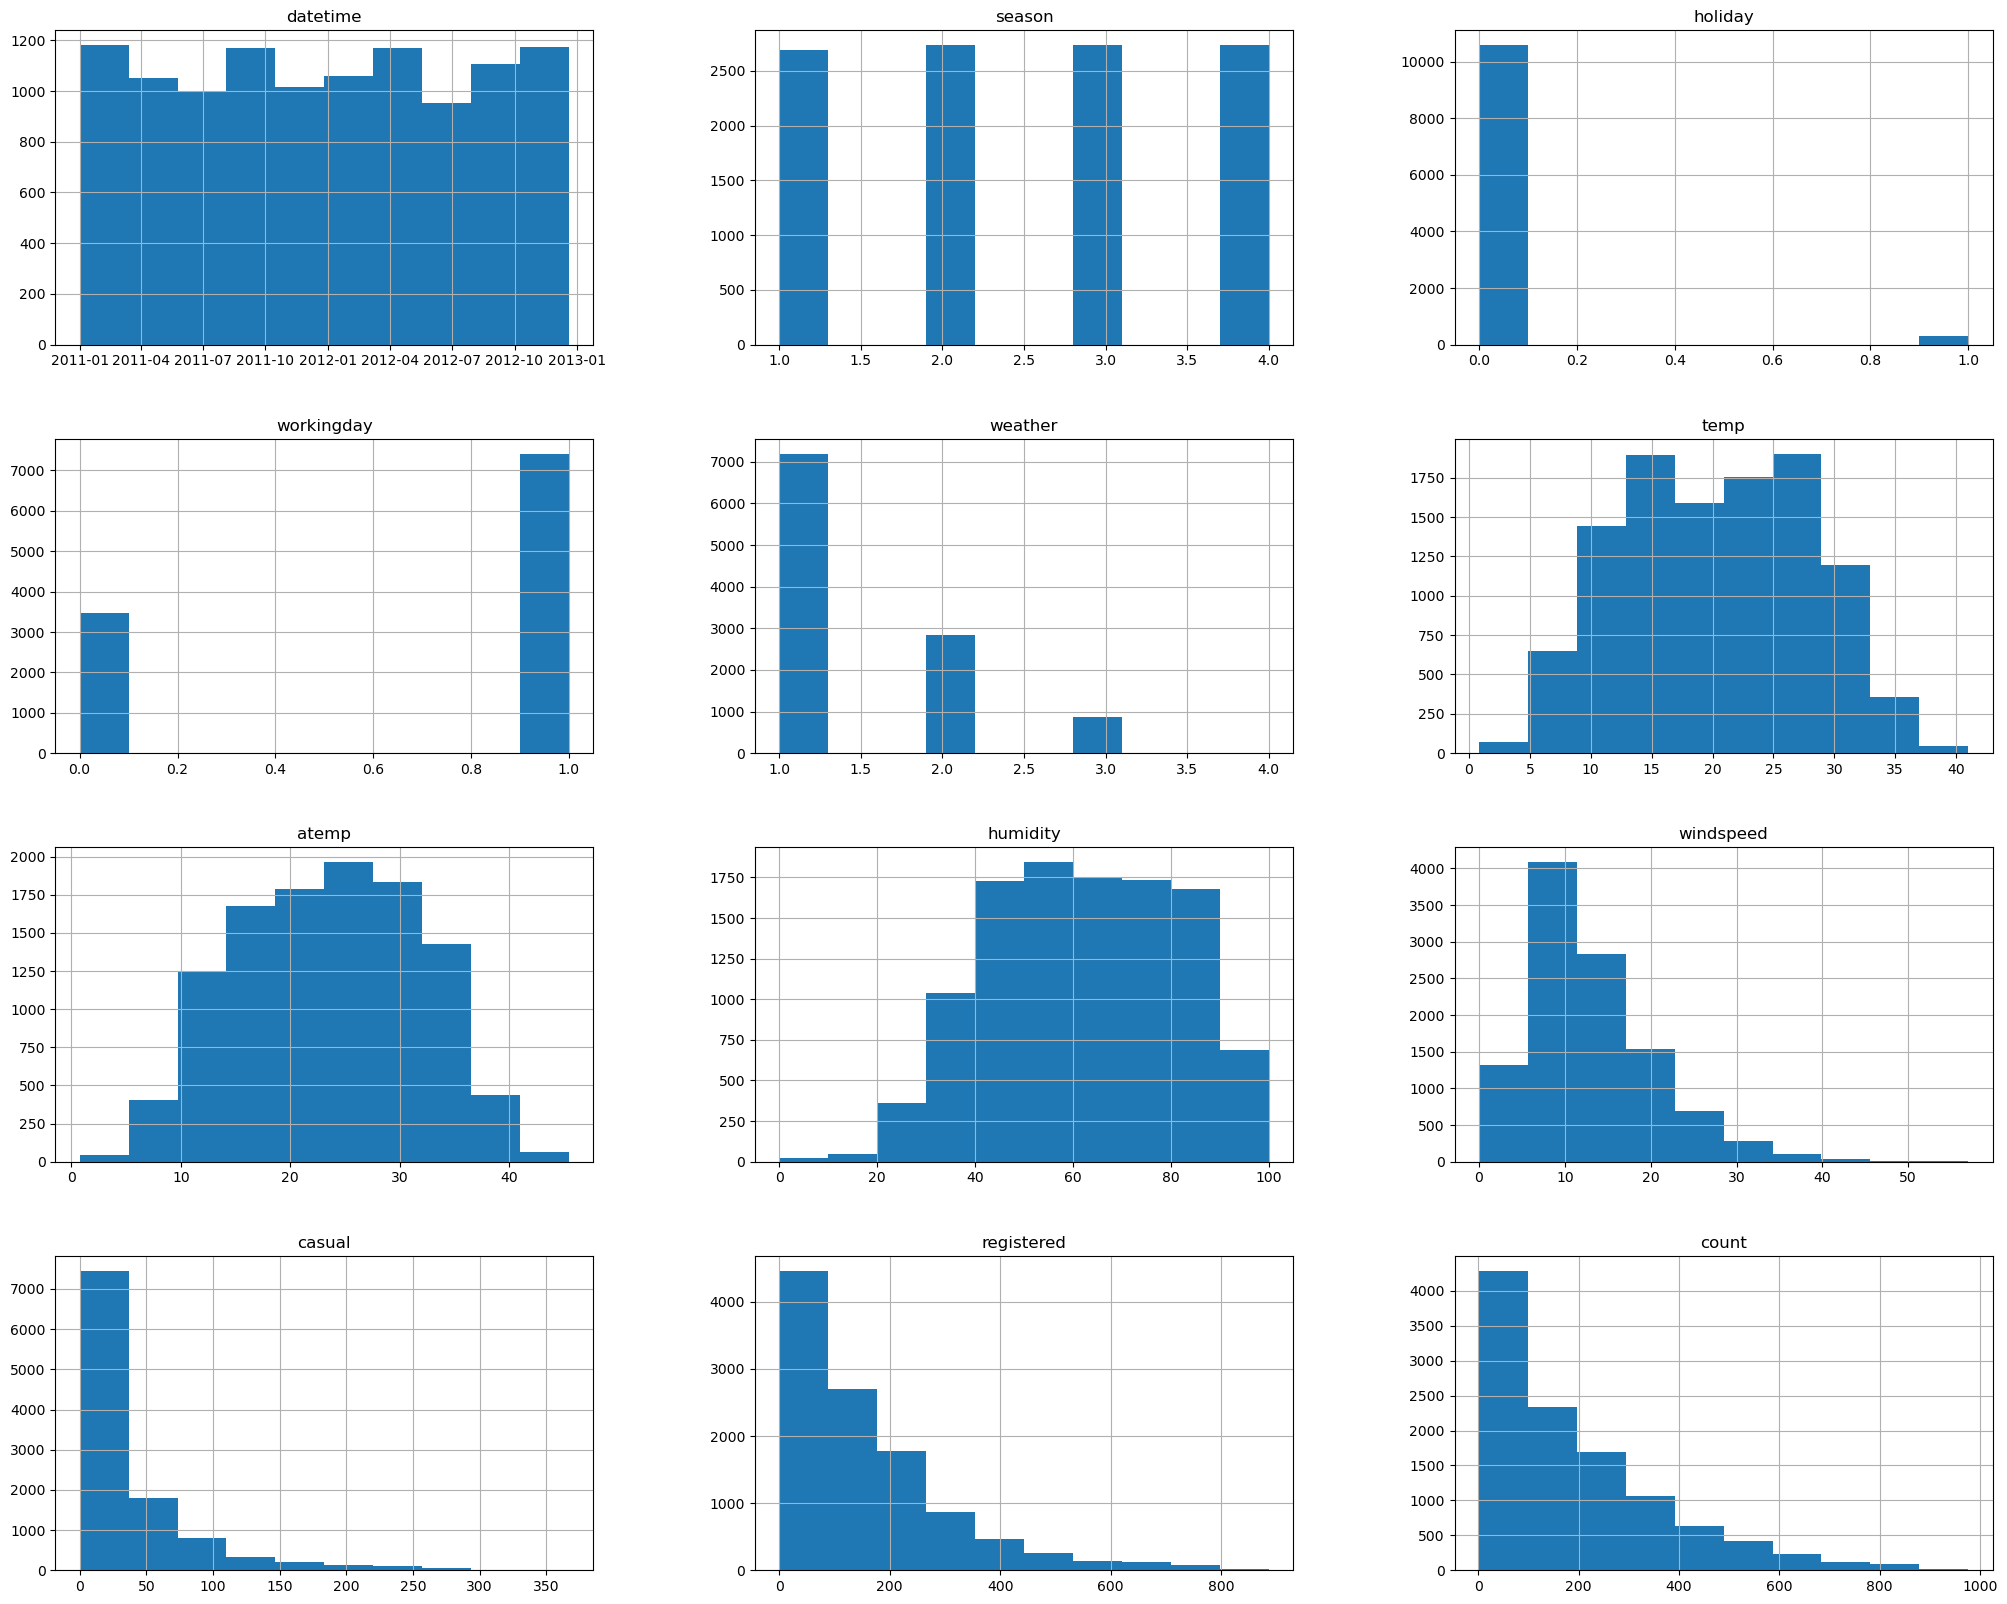

In [24]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(25,20));

"datetime2", "temp", "atemp", "humidity", "windspeed", "casual", "registered" and "count" have normal distribution with "windspeed", "casual", "registered" and "count" skewed to the left. While "temp", "atemp", "humidity" have bell curve distribution. "datetime" feature showed more data squished together which will be the first feature i will work on. "season", "holiday", "workingday", "weather" features are more of bar graphs than histograms, this show that these features are categorical variables with "holiday" and "workingday" showing binary classifications where values are in between 0 and 1. 

In [32]:
correlation = train.corr()
correlation

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


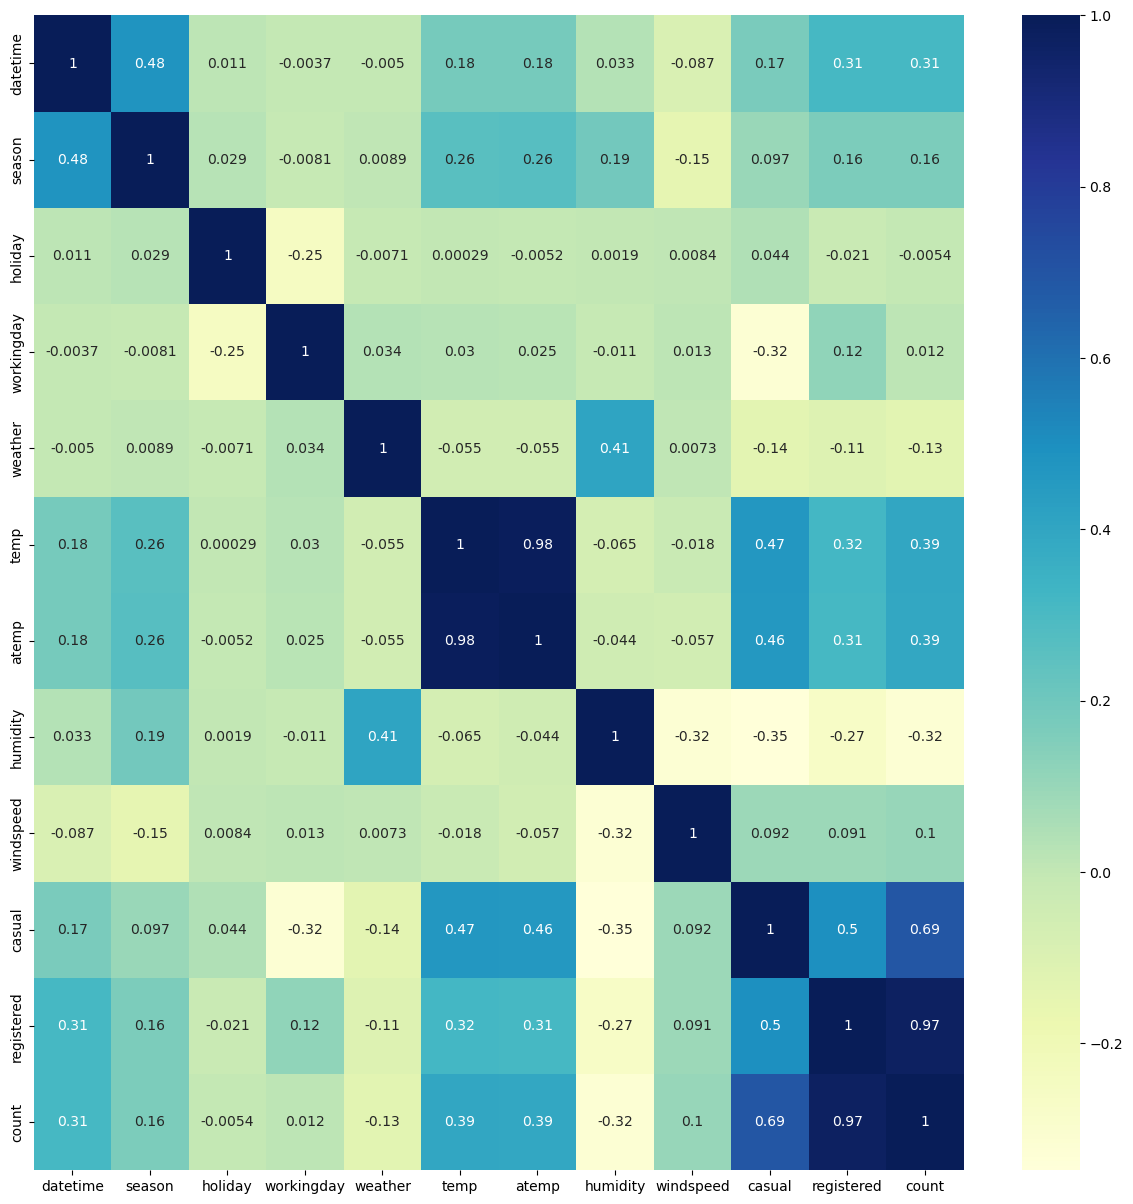

In [35]:
plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

The target column "count" has high positive correlation with "casual" and "registered" column, however, this columns were ignored as they were not present in the test data. "atemp" and "temp" columns showed high positive correlation. "holiday", "humidity" and "weather" showed weak negative correlation with the target column "count". "temp" and "atemp" showed moderate positive correlation with the target column with the same correlation coefficient value. More investigation will be done through EDA

In [8]:
# Checking 'datetime' column in train data to create new features
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [9]:
# create a new feature from datetime column
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [10]:
# Drop 'datetime' column

train.drop(["datetime"], axis=1, inplace=True)     
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [11]:
# Drop 'datetime' column

test.drop(["datetime"], axis=1, inplace=True)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int32  
 12  month       10886 non-null  int32  
 13  day         10886 non-null  int32  
 14  hour        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(8)
memory usage: 1.1 MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   year        6493 non-null   int32  
 9   month       6493 non-null   int32  
 10  day         6493 non-null   int32  
 11  hour        6493 non-null   int32  
dtypes: float64(3), int32(4), int64(5)
memory usage: 507.4 KB


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [10]:
train['season'] = train['season'].astype('category')
train['weather'] = train['weather'].astype('category')
test['season'] = test['season'].astype('category')
test['weather'] = test['weather'].astype('category')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(6)
memory usage: 872.3 KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(3)
memory usage: 368.3 KB


In [12]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


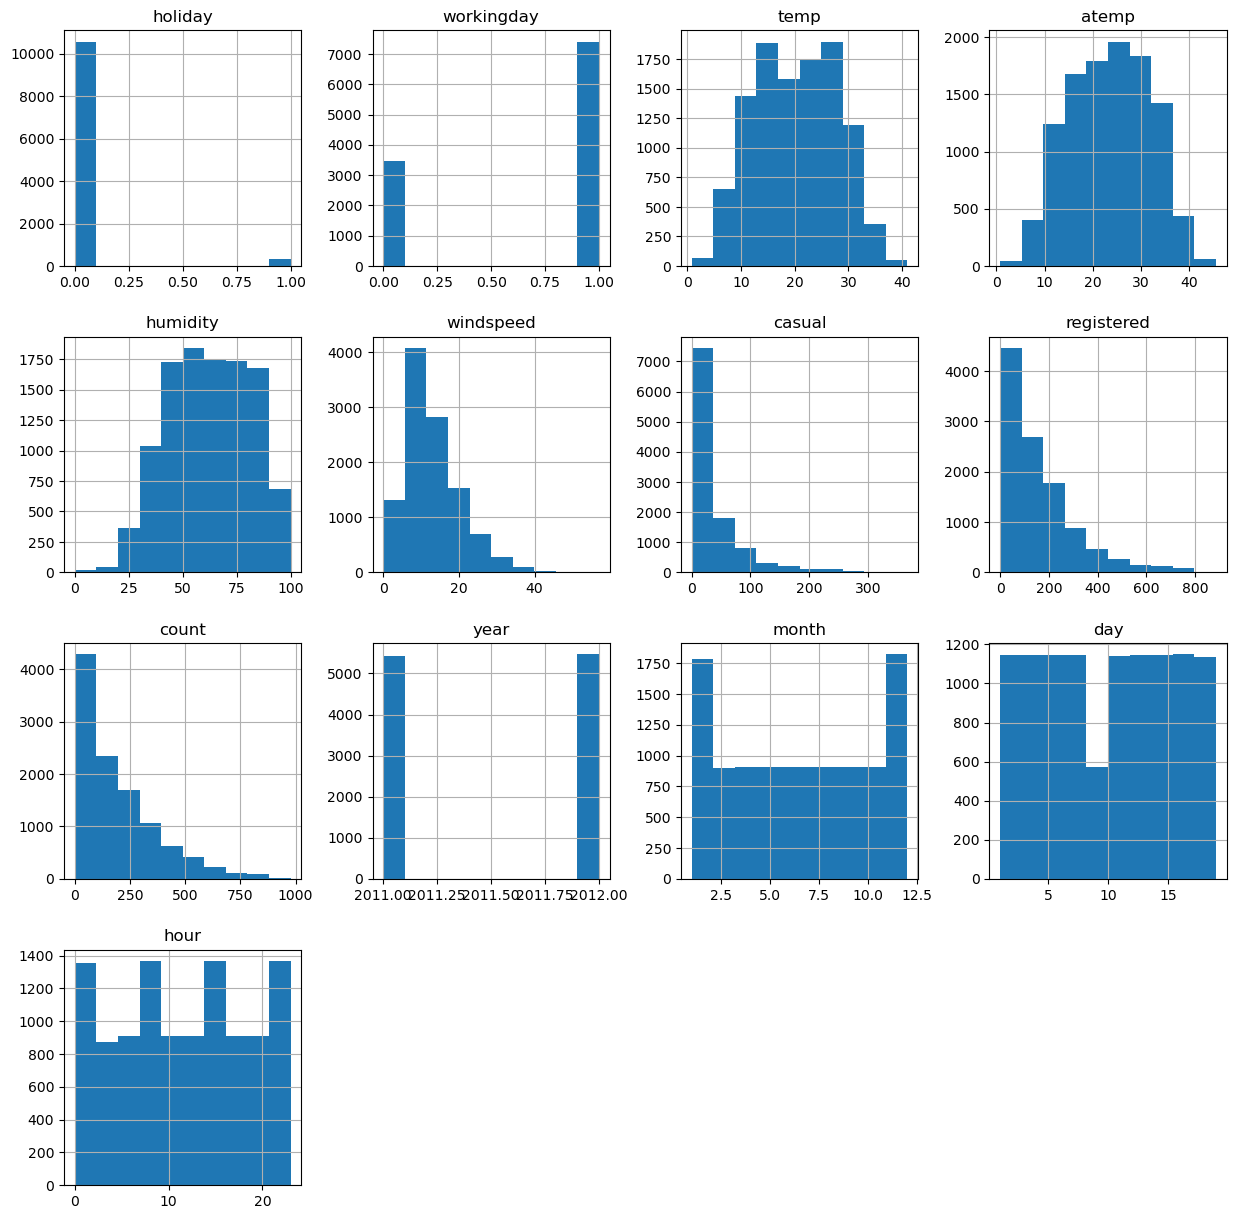

In [19]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,15));

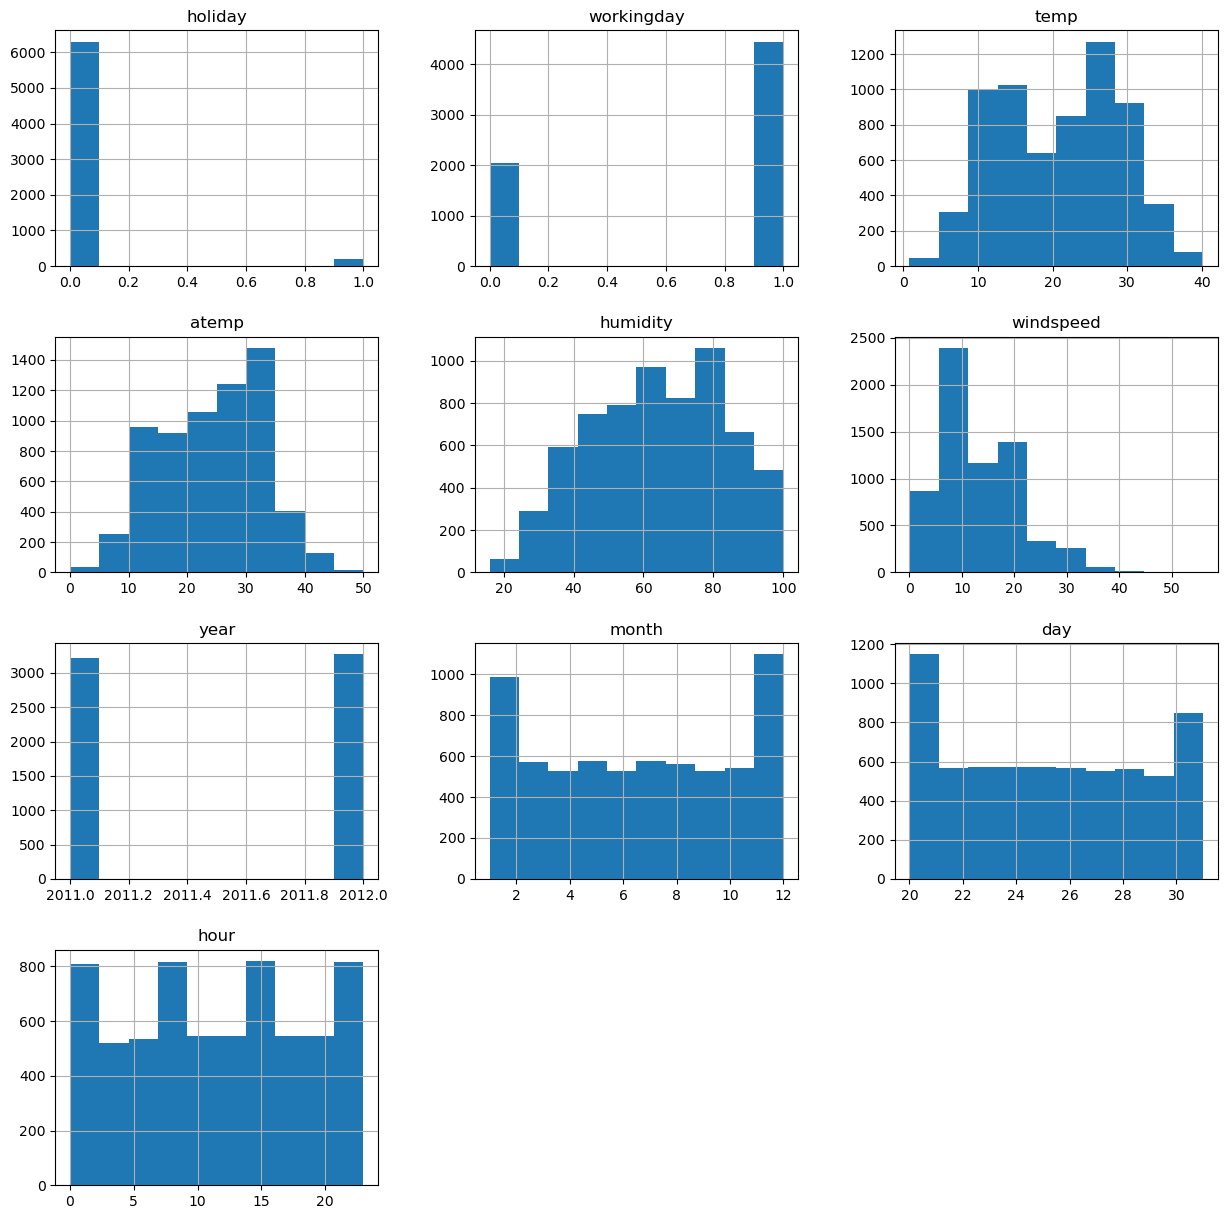

In [20]:
test.hist(figsize=(15,15));

In [23]:
train.year.unique()

array([2011, 2012], dtype=int32)

In [25]:
train.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [26]:
train.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int32)

In [27]:
train.holiday.unique()

array([0, 1])

In [28]:
train.workingday.unique()

array([0, 1])

In [29]:
train.temp

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
         ...  
10881    15.58
10882    14.76
10883    13.94
10884    13.94
10885    13.12
Name: temp, Length: 10886, dtype: float64

In [33]:
train.atemp

0        14.395
1        13.635
2        13.635
3        14.395
4        14.395
          ...  
10881    19.695
10882    17.425
10883    15.910
10884    17.425
10885    16.665
Name: atemp, Length: 10886, dtype: float64

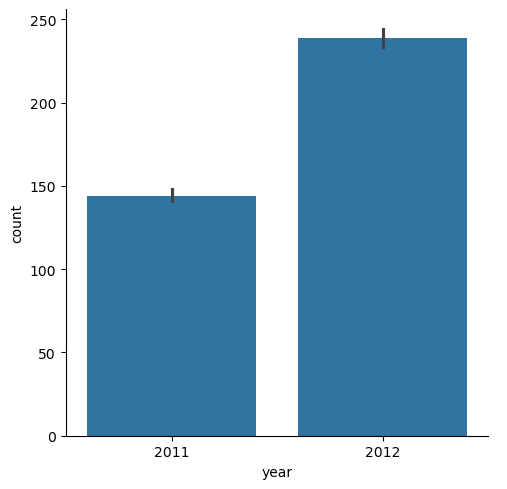

In [44]:
sns.catplot(data=train, x="year", y="count", kind="bar");

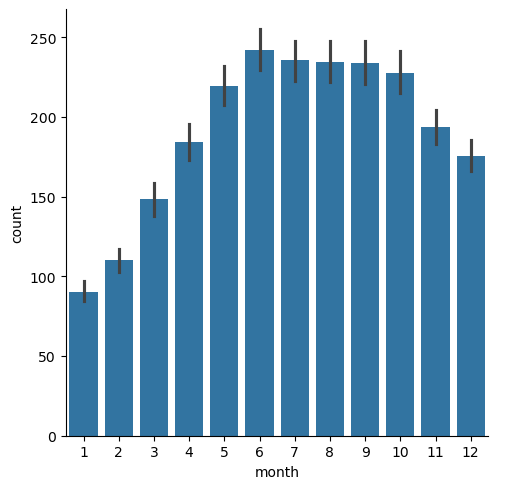

In [45]:
sns.catplot(data=train, x="month", y="count", kind="bar");

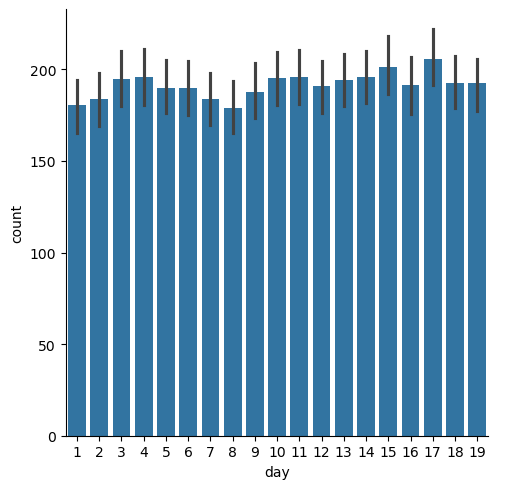

In [46]:
sns.catplot(data=train, x="day", y="count", kind="bar");

In [24]:
test.year.unique()

array([2011, 2012], dtype=int32)

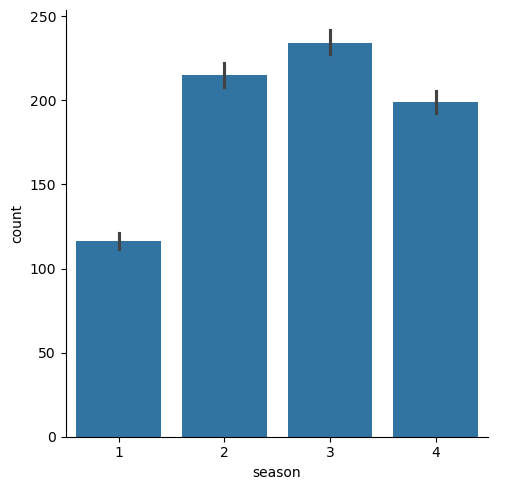

In [14]:
sns.catplot(data=train, x="season", y="count", kind="bar");

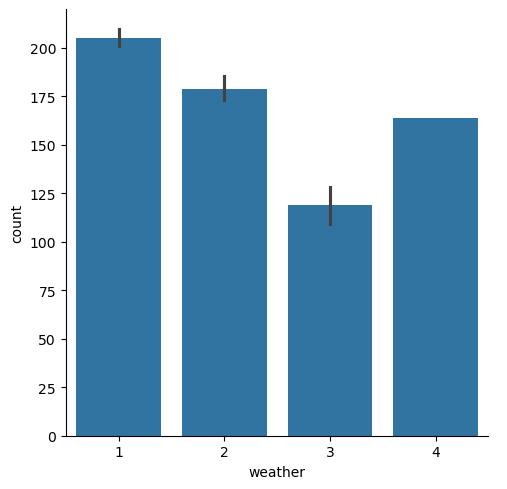

In [15]:
sns.catplot(data=train, x="weather", y="count", kind="bar");

In [17]:
# Mapping numbers to understandable text
season_dict = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_dict = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'}
train['season'] = train['season'].map(season_dict)
train['weather'] = train['weather'].map(weather_dict)

test['season'] = test['season'].map(season_dict)
test['weather'] = test['weather'].map(weather_dict)

In [18]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1


In [19]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,Spring,0,1,Clear,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,Spring,0,1,Clear,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,Spring,0,1,Clear,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,Spring,0,1,Clear,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,Spring,0,1,Clear,10.66,12.880,56,11.0014


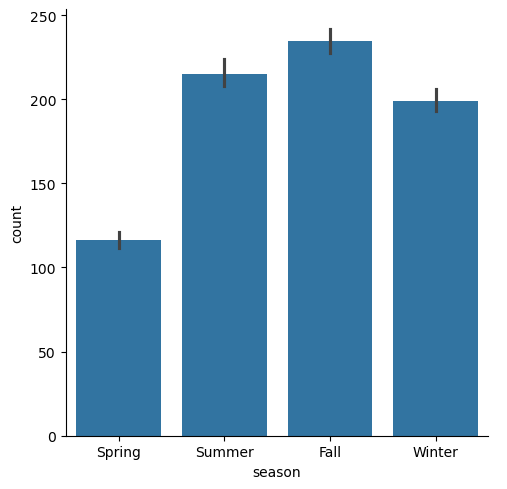

In [20]:
sns.catplot(data=train, x="season", y="count", kind="bar");

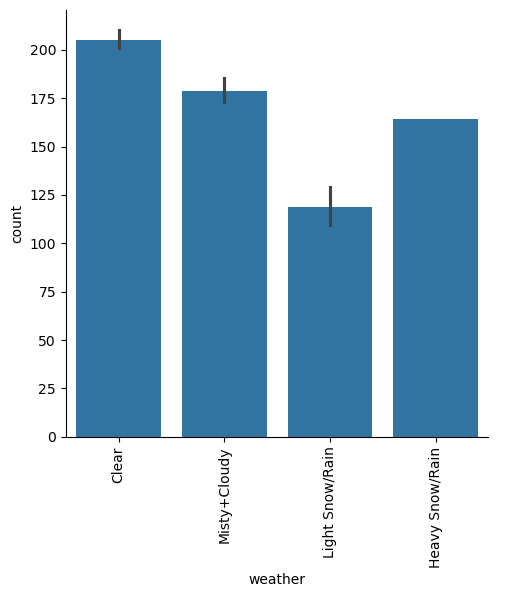

In [23]:
sns.catplot(data=train, x="weather", y="count", kind="bar")
plt.xticks(rotation=90);

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(
    train_data=train, time_limit=600, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240502_220151"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240502_220151"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   3.88 GB / 5.36 GB (72.5%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", 

[1000]	valid_set's rmse: 38.184
[2000]	valid_set's rmse: 36.6987
[3000]	valid_set's rmse: 36.2508
[4000]	valid_set's rmse: 36.1133
[5000]	valid_set's rmse: 36.0733
[6000]	valid_set's rmse: 36.1156
[1000]	valid_set's rmse: 39.6093
[2000]	valid_set's rmse: 38.0481
[3000]	valid_set's rmse: 37.5209
[4000]	valid_set's rmse: 37.1498
[5000]	valid_set's rmse: 36.9599
[6000]	valid_set's rmse: 36.8619
[7000]	valid_set's rmse: 36.785
[8000]	valid_set's rmse: 36.7078
[9000]	valid_set's rmse: 36.6775
[10000]	valid_set's rmse: 36.6686
[1000]	valid_set's rmse: 38.8814
[2000]	valid_set's rmse: 37.4725
[3000]	valid_set's rmse: 36.9329
[4000]	valid_set's rmse: 36.7302
[5000]	valid_set's rmse: 36.6349
[6000]	valid_set's rmse: 36.5147
[7000]	valid_set's rmse: 36.4169
[8000]	valid_set's rmse: 36.3532
[9000]	valid_set's rmse: 36.3165
[10000]	valid_set's rmse: 36.2812
[1000]	valid_set's rmse: 39.7769
[2000]	valid_set's rmse: 38.2223
[3000]	valid_set's rmse: 37.8181
[4000]	valid_set's rmse: 37.7098
[1000]	val

	-37.0978	 = Validation score   (-root_mean_squared_error)
	72.87s	 = Training   runtime
	13.29s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 298.66s of the 498.72s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 36.6982
[2000]	valid_set's rmse: 36.2915
[3000]	valid_set's rmse: 36.2664
[1000]	valid_set's rmse: 37.4772
[2000]	valid_set's rmse: 36.6554
[3000]	valid_set's rmse: 36.3048
[4000]	valid_set's rmse: 36.368
[1000]	valid_set's rmse: 37.1871
[2000]	valid_set's rmse: 36.5679
[3000]	valid_set's rmse: 36.3483
[4000]	valid_set's rmse: 36.4205
[1000]	valid_set's rmse: 39.3305
[2000]	valid_set's rmse: 38.9471
[3000]	valid_set's rmse: 38.833
[4000]	valid_set's rmse: 38.8207
[1000]	valid_set's rmse: 40.5725
[2000]	valid_set's rmse: 40.2289
[1000]	valid_set's rmse: 36.4101
[2000]	valid_set's rmse: 36.0051
[1000]	valid_set's rmse: 41.5518
[2000]	valid_set's rmse: 41.0615
[3000]	valid_set's rmse: 40.9186
[4000]	valid_set's rmse: 40.9948
[1000]	valid_set's rmse: 36.8879


	-37.6929	 = Validation score   (-root_mean_squared_error)
	28.66s	 = Training   runtime
	3.68s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 262.04s of the 462.1s of remaining time.
	-42.1506	 = Validation score   (-root_mean_squared_error)
	13.4s	 = Training   runtime
	0.76s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 247.31s of the 447.37s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3106.
	Ran out of time, early stopping on iteration 2853.
	Ran out of time, early stopping on iteration 3138.
	Ran out of time, early stopping on iteration 3161.
	Ran out of time, early stopping on iteration 3604.
	Ran out of time, early stopping on iteration 4035.
	Ran out of time, early stopping on iteration 4445.
	-38.1986	 = Validation score   (-root_mean_squared_error)
	237.17s	 = Training   runtime
	0.1s	 = Vali

In [26]:
predictor_new_features = TabularPredictor.load("AutogluonModels/ag-20240502_220151/")

In [27]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.686201      20.580213  547.479618                0.000718           0.299604            3       True         17
1      WeightedEnsemble_L2  -35.885582      17.815583  352.449209                0.000601           0.341909            2       True          9
2     ExtraTreesMSE_BAG_L2  -35.987385      19.439915  371.291970                0.604892          10.914337            2       True         14
3          LightGBM_BAG_L2  -36.203053      18.926715  368.958404                0.091692           8.580771            2       True         11
4   NeuralNetFastAI_BAG_L2  -36.235664      19.124946  432.877260                0.289923          72.499628            2       True         15
5          CatBoost_BAG_L2  -36.333399      18.878628  411.165566         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.93326033133259,
  'KNeigh

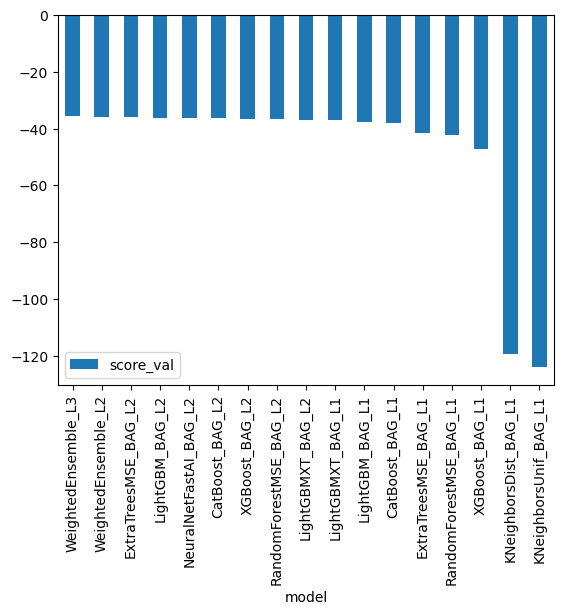

In [50]:
#output the model's 'score_val' in a bar chart to compare performance
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

In [51]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    13.397765
1     4.482935
2     3.482263
3     3.989434
4     3.726772
Name: count, dtype: float32

In [52]:
# use describe to investigate for negative values
predictions_new_features.describe()

count    6493.000000
mean      188.791626
std       172.399918
min         0.143288
25%        45.673985
50%       146.866348
75%       279.695343
max       885.755859
Name: count, dtype: float64

In [53]:
# How many negative values do we have?
predictions_new_features[ predictions_new_features<0].count()

0

In [54]:
# Remember to set all negative values to zero
predictions_new_features[ predictions_new_features<0] = 0

In [55]:
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [56]:
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [15]:
!pip install -q Kaggle

In [59]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 625kB/s]
Successfully submitted to Bike Sharing Demand

In [60]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-02 22:39:29  new features          complete  0.46423      0.46423       
submission.csv               2024-04-30 21:44:37  first raw submission  complete  1.80161      1.80161       
submission.csv               2024-04-29 21:39:17  first raw submission  error                                
submission (1).csv           2024-04-29 20:57:04                        error                                


#### New Score of `0.46423`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [64]:
import autogluon.core as ag

num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 150,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   #'NN': nn_options,  # NOTE: i commented this line out because of errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained


hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    #'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}


In [65]:
predictor_new_hpo = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(
    train_data=train, time_limit=600, presets="best_quality",hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240502_225715"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240502_225715"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   2.50 GB / 5.36 GB (46.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", 

In [28]:
predictor_new_hpo = TabularPredictor.load("AutogluonModels/ag-20240502_225715/")

In [29]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -37.719401       0.010453  386.742875                0.000617           0.236053            3       True         73
1    LightGBM_BAG_L2/T7  -37.915083       0.009560  359.829382                0.000097          10.109006            2       True         66
2    LightGBM_BAG_L2/T2  -37.932894       0.009562  362.045255                0.000099          12.324879            2       True         61
3   WeightedEnsemble_L2  -37.951977       0.001349   29.810485                0.000722           0.258757            2       True         59
4   LightGBM_BAG_L2/T13  -37.965835       0.009573  362.490433                0.000109          12.770057            2       True         72
5   LightGBM_BAG_L2/T10  -38.064321       0.009640  364.072937                0.000176      

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T8': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T9': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T10': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T11': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T12': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T13': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T14': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T15': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T16': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T17': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T18': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T19': 'StackerEnsembl

In [72]:
new_predictions_hpo = predictor_new_hpo.predict(test)

In [73]:
new_predictions_hpo[new_predictions_hpo<0].count()

0

In [74]:
# Remember to set all negative values to zero
new_predictions_hpo[new_predictions_hpo<0] = 0 

In [75]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,13.397765
1,2011-01-20 01:00:00,4.482935
2,2011-01-20 02:00:00,3.482263
3,2011-01-20 03:00:00,3.989434
4,2011-01-20 04:00:00,3.726772


In [76]:
submission_new_features.describe()

,datetime,count
count,6493,6493.000000
mean,2012-01-13 09:27:47.765285632,188.791626
min,2011-01-20 00:00:00,0.143288
25%,2011-07-22 15:00:00,45.673985
50%,2012-01-20 23:00:00,146.866348
75%,2012-07-20 17:00:00,279.695343
max,2012-12-31 23:00:00,885.755859
std,NaN,172.399918


In [77]:
# Same submitting predictions
submission_new_hpo["count"] = new_predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [78]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 690kB/s]
Successfully submitted to Bike Sharing Demand

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-02 23:24:04  new features with hyperparameters  complete  0.4837       0.4837        
submission_new_features.csv  2024-05-02 22:39:29  new features                       complete  0.46423      0.46423       
submission.csv               2024-04-30 21:44:37  first raw submission               complete  1.80161      1.80161       
submission.csv               2024-04-29 21:39:17  first raw submission               error                                


#### New Score of `0.4837`

## Step 6.1: Hyper parameter optimization

In [17]:
import autogluon.core as ag

# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = {  # hyperparameters of each model type
                   'XGB': xgb_options
                  }  

num_trials = 5            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }


In [18]:
predictor_new_hpo1 = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(
    train_data=train, time_limit=600, presets="best_quality",hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240503_165343"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240503_165343"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   2.19 GB / 5.36 GB (40.8%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", 

  0%|          | 0/5 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray is required to train folds in parallel for TabularPredictor or HPO for MultiModalPredictor. A quick tip is to install via `pip install ray==2.6.3`
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
Fitted model: XGBoost_BAG_L1/T1 ...
	-42.3133	 = Validation score   (-root_mean_squared_error)
	2.81s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-41.3607	 = Validation score   (-root_mean_squared_error)
	8.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
Fitted model: XGBoost_BAG_L2/T1 ...
	-38.6635	 = Validation score   (-root_mean_squared_error)
	6.8s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	-38.6615	 = Validation score   (-root_mean_squared_error)
	13.55s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T3 ...
	-39.3048	 = Validation score   (-root_mean_squared_error)
	13.45s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T4 ...
	-38.2039	 = Validation score   (-root_mean_squared_error)
	5.98s	 

In [32]:
predictor_new_hpo1 = TabularPredictor.load("AutogluonModels/ag-20240503_165343/")

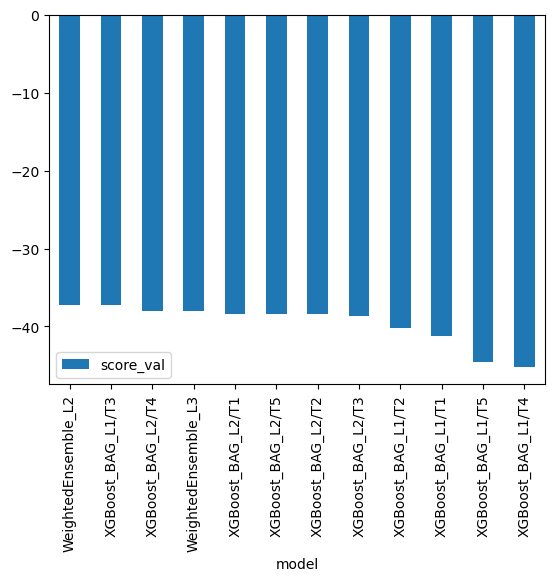

In [33]:
predictor_new_hpo1.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

In [20]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -37.204312       7.131265  191.360563                0.002740           1.152184            2       True          6
1     XGBoost_BAG_L1/T3 -37.210337       3.227705   98.683175                3.227705          98.683175            1       True          3
2     XGBoost_BAG_L2/T4 -38.025607      14.856861  375.349005                0.244806          14.687901            2       True         10
3   WeightedEnsemble_L3 -38.025607      14.857437  375.581874                0.000576           0.232869            3       True         12
4     XGBoost_BAG_L2/T1 -38.361395      14.820277  375.167990                0.208222          14.506886            2       True          7
5     XGBoost_BAG_L2/T5 -38.377256      15.252895  404.455776                0.640840          43.

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T3': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T4': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T5': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T3': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T4': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T5': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'XGBoost_BAG_L1/T1': -41.25180984349735,
  'XGBoost_BAG_L1/T2': -40.16697549653705,
  'XGBoost_BAG_L1/T3': -37.21033705016009,
  'XGBoost_BAG_L1/T4': -45.199172776080864,
  'XGBoost_BAG_L1/T5': -44.511863806083866,
  'WeightedEnsemble_L2': -37.20431186014596,
  'XGBoost_BAG_L2/T1': -38.361394947558786,
  'XGBo

In [48]:
predictor_new_hpo1_df = pd.DataFrame(predictor_new_hpo1.leaderboard(silent=True))
predictor_new_hpo1_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.204312,7.131265,191.360563,0.002740,1.152184,2,True,6
1,XGBoost_BAG_L1/T3,-37.210337,3.227705,98.683175,3.227705,98.683175,1,True,3
2,XGBoost_BAG_L2/T4,-38.025607,14.856861,375.349005,0.244806,14.687901,2,True,10
3,WeightedEnsemble_L3,-38.025607,14.857437,375.581874,0.000576,0.232869,3,True,12
4,XGBoost_BAG_L2/T1,-38.361395,14.820277,375.167990,0.208222,14.506886,2,True,7
5,XGBoost_BAG_L2/T5,-38.377256,15.252895,404.455776,0.640840,43.794672,2,True,11
6,XGBoost_BAG_L2/T2,-38.381356,14.986208,400.878775,0.374154,40.217671,2,True,8
7,XGBoost_BAG_L2/T3,-38.725044,14.869235,406.262107,0.257180,45.601003,2,True,9
8,XGBoost_BAG_L1/T2,-40.166975,3.900820,91.525204,3.900820,91.525204,1,True,2
9,XGBoost_BAG_L1/T1,-41.251810,1.352191,27.067973,1.352191,27.067973,1,True,1


In [21]:
new_predictions_hpo1 = predictor_new_hpo1.predict(test)

In [22]:
new_predictions_hpo1[new_predictions_hpo1<0].count()

57

In [23]:
new_predictions_hpo1[new_predictions_hpo1<0] = 0

In [24]:
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [25]:
submission_new_hpo1["count"] = new_predictions_hpo1
submission_new_hpo1

,datetime,count
0,2011-01-20 00:00:00,12.549349
1,2011-01-20 01:00:00,1.398489
2,2011-01-20 02:00:00,0.832476
3,2011-01-20 03:00:00,0.804272
4,2011-01-20 04:00:00,0.848649
...,...,...
6488,2012-12-31 19:00:00,235.754776
6489,2012-12-31 20:00:00,165.730347
6490,2012-12-31 21:00:00,126.498520
6491,2012-12-31 22:00:00,101.417656


In [26]:
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [27]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters hpo1"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 553kB/s]
Successfully submitted to Bike Sharing Demand

In [29]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2024-05-03 17:09:09  new features with hyperparameters hpo1  complete  0.49923      0.49923       
submission_new_hpo.csv       2024-05-02 23:24:04  new features with hyperparameters       complete  0.4837       0.4837        
submission_new_features.csv  2024-05-02 22:39:29  new features                            complete  0.46423      0.46423       
submission.csv               2024-04-30 21:44:37  first raw submission                    complete  1.80161      1.80161       


#### New Score of `0.49923`

## Step 6.2: Hyper parameter optimization

In [32]:
# KNN
knn_options = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}}, 
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]  # default

hyperparameters = {'KNN': knn_options,
                   }  


num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }


In [33]:
predictor_new_hpo2 = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(
    train_data=train, time_limit=600, presets="best_quality",hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240503_171253"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240503_171253"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   1.34 GB / 5.36 GB (25.0%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", 

In [34]:
predictor_new_hpo2 = TabularPredictor.load("AutogluonModels/ag-20240503_171253/")

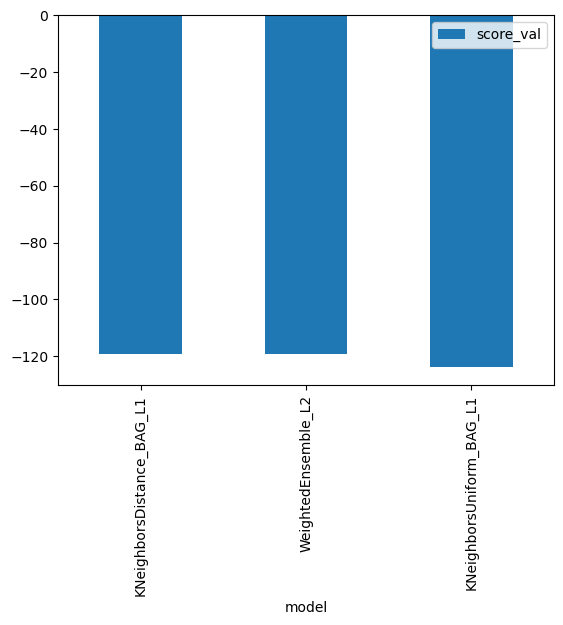

In [35]:
predictor_new_hpo2.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

In [35]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  KNeighborsDistance_BAG_L1 -119.365601       0.000088  0.205573                0.000088           0.205573            1       True          2
1        WeightedEnsemble_L2 -119.365601       0.000818  0.391661                0.000730           0.186088            2       True          3
2   KNeighborsUniform_BAG_L1 -123.933260       0.000088  0.246459                0.000088           0.246459            1       True          1
Number of models trained: 3
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_KNN'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])  : 2 | ['season', 'weather']
('float', [])     : 3 | ['temp', 'atemp', 'windspeed']
('int', [])       

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUniform_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDistance_BAG_L1': 'StackerEnsembleModel_KNN',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUniform_BAG_L1': -123.93326033133259,
  'KNeighborsDistance_BAG_L1': -119.36560130583281,
  'WeightedEnsemble_L2': -119.36560130583281},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUniform_BAG_L1': ['KNeighborsUniform_BAG_L1'],
  'KNeighborsDistance_BAG_L1': ['KNeighborsDistance_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'KNeighborsUniform_BAG_L1': 0.2464587688446045,
  'KNeighborsDistance_BAG_L1': 0.20557332038879395,
  'WeightedEnsemble_L2': 0.18608760833740234},
 'model_pred_times': {'KNeighborsUniform_BAG_L1': 8.821487426757812e-05,
  'KNeighborsDistance_BAG_L1': 8.845329284667969e-05,
  'WeightedEnsemble_L2': 0.0007300376892089844},
 'num_bag_folds': 8,
 'max_stack_level': 2,
 'model_hyperparams': {'KNeighbo

In [36]:
# Leaderboard dataframe
predictor_new_hpo2_df = pd.DataFrame(predictor_new_hpo2.leaderboard(silent=True))
predictor_new_hpo2_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDistance_BAG_L1,-119.365601,0.000088,0.205573,0.000088,0.205573,1,True,2
1,WeightedEnsemble_L2,-119.365601,0.000818,0.391661,0.000730,0.186088,2,True,3
2,KNeighborsUniform_BAG_L1,-123.933260,0.000088,0.246459,0.000088,0.246459,1,True,1


In [37]:
new_predictions_hpo2 = predictor_new_hpo2.predict(test)

In [38]:
new_predictions_hpo2[new_predictions_hpo2<0].count()

0

In [39]:
new_predictions_hpo2[new_predictions_hpo2<0] = 0

In [40]:
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo2.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [41]:
submission_new_hpo2["count"] = new_predictions_hpo2
submission_new_hpo2

,datetime,count
0,2011-01-20 00:00:00,100.566223
1,2011-01-20 01:00:00,23.752136
2,2011-01-20 02:00:00,23.460564
3,2011-01-20 03:00:00,5.965271
4,2011-01-20 04:00:00,14.904503
...,...,...
6488,2012-12-31 19:00:00,109.379845
6489,2012-12-31 20:00:00,109.277153
6490,2012-12-31 21:00:00,109.168045
6491,2012-12-31 22:00:00,90.123566


In [42]:
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters hpo2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 690kB/s]
Successfully submitted to Bike Sharing Demand

In [47]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo2.csv      2024-05-03 17:26:29  new features with hyperparameters hpo2  complete  1.09996      1.09996       
submission_new_hpo1.csv      2024-05-03 17:25:11  new features with hyperparameters hpo2  complete  0.49923      0.49923       
submission_new_hpo1.csv      2024-05-03 17:09:09  new features with hyperparameters hpo1  complete  0.49923      0.49923       
submission_new_hpo.csv       2024-05-02 23:24:04  new features with hyperparameters       complete  0.4837       0.4837        


#### New Score of `1.09996`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [43]:
predictor.leaderboard(silent=True)['score_val'][0]

-37.20431186014596

In [44]:
predictor_new_features.leaderboard(silent=True)['score_val'][0]

-35.6862007419382

In [45]:
predictor_new_hpo.leaderboard(silent=True)['score_val'][0]

-37.71940123855172

In [46]:
predictor_new_hpo1.leaderboard(silent=True)['score_val'][0]

-37.20431186014596

In [47]:
predictor_new_hpo2.leaderboard(silent=True)['score_val'][0]

-119.36560130583281

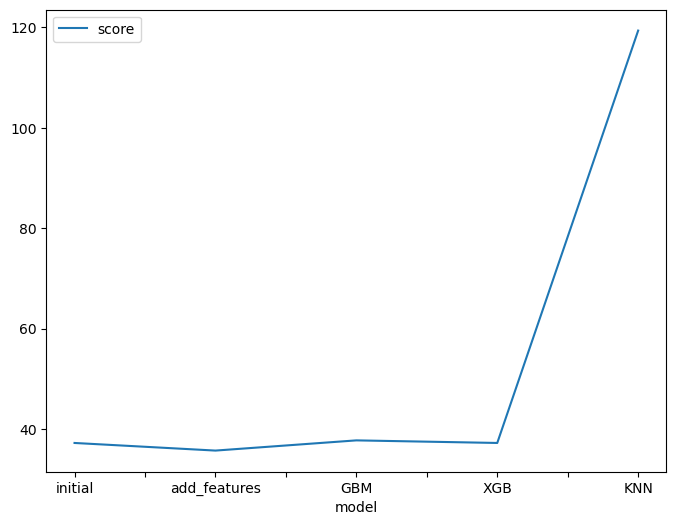

In [3]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "GBM", "XGB", "KNN"],
        "score": [37.2043112, 35.686201, 37.719401, 37.204312, 119.365601]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

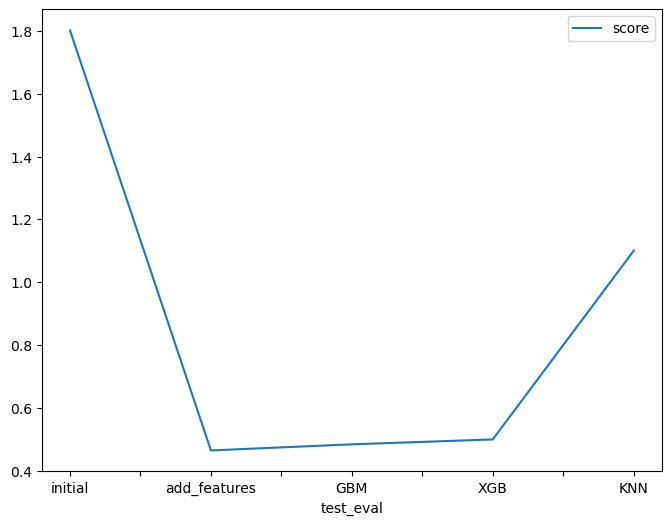

In [50]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "GBM", "XGB", "KNN"],
        "score": [1.80161, 0.46423, 0.4837, 0.49923, 1.09996]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [53]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "GBM", "XGB", "KNN"],
    "Time Limit": [600, 600, 600, 600, 600],
    "Architecture Used": ["Default", "Default", "GBM", "XGB", "KNN"],
    "Training Data": ["Standard", "New Features Added", "GBM Hyperparameters Added", 
                      "XGB Hyperparameters Added", "KNN Hyperparameters Added"],
    "score": [1.80161, 0.46423, 0.4837, 0.49923, 1.09996]
})

,model,Time Limit,Architecture Used,Training Data,score
0,initial,600,Default,Standard,1.80161
1,add_features,600,Default,New Features Added,0.46423
2,GBM,600,GBM,GBM Hyperparameters Added,0.48370
3,XGB,600,XGB,XGB Hyperparameters Added,0.49923
4,KNN,600,KNN,KNN Hyperparameters Added,1.09996
